In [ ]:
# Installing the required modules

# pip install pandas

In [1]:
import pandas as pd

# Loading the movies.csv file to get the shape
movies_df = pd.read_csv('movie_data/movies.csv')

print(movies_df.shape) # output: (9742, 3)

(9742, 3)


In [2]:
# Loading the RATINGS.csv file to get the shape
movies_df = pd.read_csv('movie_data/ratings.csv')

print(movies_df.shape) # output (100836, 4)

(100836, 4)


In [3]:
# Reading the csv
ratings_df = pd.read_csv('movie_data/ratings.csv')

print(ratings_df['userId'].nunique()) # Output: 610



610


In [9]:
import pandas as pd


# Group by movieId and count the number of ratings for each movie
ratings_count = ratings_df.groupby('movieId').size().reset_index(name='count')

# Find the movieId with the maximum number of ratings
max_ratings_movie_id = ratings_count.loc[ratings_count['count'].idxmax()]['movieId']

# Get the movie title for the movieId with the maximum number of ratings
max_ratings_movie = movies_df[movies_df['movieId'] == max_ratings_movie_id]['title'].values[0]

print(max_ratings_movie) # Output: Forrest Gump (1994)

Forrest Gump (1994)


In [10]:
tags_df = pd.read_csv('movie_data/tags.csv')

# Find the movieId for "Matrix, The (1999)"
matrix_movie_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].values[0]

# Filter the tags for the movieId
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]['tag'].unique()

print(f"Tags for 'Matrix, The (1999)': {matrix_tags}")



Tags for 'Matrix, The (1999)': ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [11]:
terminator_movie_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

# Filter the ratings for the movieId
terminator_ratings = ratings_df[ratings_df['movieId'] == terminator_movie_id]['rating']

# Calculate the average rating
average_rating = terminator_ratings.mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.970982142857143


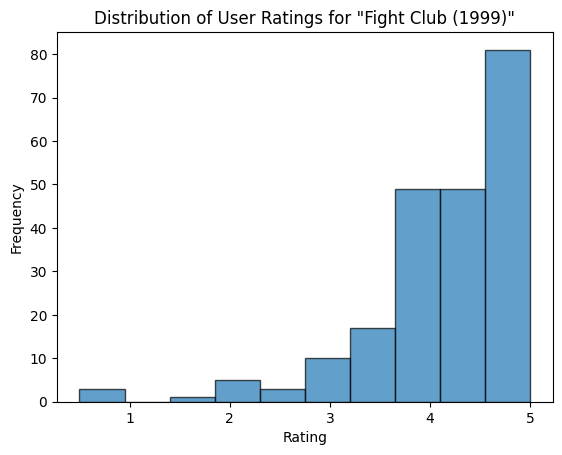

In [12]:
import matplotlib.pyplot as plt

# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].values[0]

# Filter the ratings for the movieId
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]['rating']

# Plot a histogram of the ratings
plt.hist(fight_club_ratings, bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.show()

In [13]:
'''🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.'''


import pandas as pd

# Load the movies and ratings data
movies_df = pd.read_csv('movie_data/movies.csv')
ratings_df = pd.read_csv('movie_data/ratings.csv')

# Step 1: Group the user ratings based on movieId and apply aggregation operations
grouped_ratings = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()

# Step 2: Apply inner join on movies_df and grouped_ratings
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter only those movies which have more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]

print(filtered_df)

      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  rating_count  rating_mean  
0     Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                      Adventure|Children|Fantasy           110     3.431818  
2                                  Comedy|Romance            52     3.259615  
5                           Action|Crime|Thriller           102     3.9

In [14]:
# Find the movie with the highest average rating
most_popular_movie = filtered_df.loc[filtered_df['rating_mean'].idxmax()]

print(f"The most popular movie based on average user ratings is: {most_popular_movie['title']} with an average rating of {most_popular_movie['rating_mean']}")

The most popular movie based on average user ratings is: Shawshank Redemption, The (1994) with an average rating of 4.429022082018927


In [15]:

# Find the top 5 popular movies based on the number of user ratings
top_5_popular_movies = filtered_df.nlargest(5, 'rating_count')

print("Top 5 popular movies based on the number of user ratings:")
print(top_5_popular_movies[['title', 'rating_count']])

Top 5 popular movies based on the number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [16]:

# Filter for Sci-Fi movies
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi', case=False, na=False)]

# Find the third most popular Sci-Fi movie based on the number of user ratings
third_most_popular_sci_fi_movie = sci_fi_movies.nlargest(3, 'rating_count').iloc[2]

print(f"The third most popular Sci-Fi movie based on the number of user ratings is: {third_most_popular_sci_fi_movie['title']} with {third_most_popular_sci_fi_movie['rating_count']} ratings")

The third most popular Sci-Fi movie based on the number of user ratings is: Jurassic Park (1993) with 238 ratings


In [41]:

import requests
import numpy as np
from bs4 import BeautifulSoup

# Load the links data
links_df = pd.read_csv('movie_data/links.csv')


# Merge the filtered movies data with the links data to get IMDB IDs
merged_links_df = pd.merge(filtered_df, links_df, on='movieId', how='inner')


def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('div', attrs={'data-testid': 'hero-rating-bar__aggregate-rating__score'})
    print(imdb_rating.text) # ignore this, i added print statement to check if the rating is coming or not.
    return imdb_rating.text if imdb_rating else np.nan

# Scrape IMDB ratings for each movie
merged_links_df['imdb_rating'] = merged_links_df['imdbId'].apply(lambda x: scrapper(str(x).zfill(7)))
#  also print how many toatal movies are there and how many movies have imdb rating


# Find the movie with the highest IMDB rating
highest_imdb_rating_movie = merged_links_df.loc[merged_links_df['imdb_rating'].idxmax()]

print(f"The movieId of the movie with the highest IMDB rating is: {highest_imdb_rating_movie['movieId']}, data: {highest_imdb_rating_movie}")



8.3/10
7.1/10
6.7/10
8.3/10
6.3/10
7.2/10
6.8/10
8.2/10
7.7/10
6.4/10
6.9/10
7.5/10
8.0/10
6.9/10
7.5/10
6.9/10
8.6/10
6.7/10
8.5/10
7.3/10
7.2/10
6.1/10
7.0/10
8.3/10
8.2/10
7.2/10
6.8/10
7.7/10
5.4/10
6.2/10
5.3/10
7.3/10
7.1/10
7.6/10
6.0/10
5.6/10
5.6/10
6.0/10
6.3/10
7.7/10
6.2/10
7.3/10
7.8/10
7.5/10
8.6/10
7.5/10
7.2/10
6.6/10
8.5/10
8.9/10
7.5/10
7.0/10
6.6/10
9.3/10
6.6/10
7.7/10
6.8/10
6.9/10
6.9/10
6.7/10
7.5/10
8.8/10
7.1/10
8.5/10
6.9/10
7.0/10
6.5/10
7.3/10
7.3/10
6.8/10
5.5/10
5.6/10
6.5/10
5.4/10
6.9/10
6.7/10
6.9/10
7.8/10
6.6/10
7.2/10
8.2/10
6.5/10
7.1/10
7.7/10
7.5/10
6.7/10
9.0/10
6.8/10
8.1/10
7.9/10
6.4/10
7.8/10
7.9/10
7.7/10
7.1/10
8.0/10
8.6/10
8.0/10
7.5/10
8.6/10
7.6/10
8.0/10
7.5/10
7.1/10
8.1/10
7.2/10
6.4/10
6.5/10
6.3/10
7.4/10
6.5/10
8.3/10
8.1/10
7.0/10
6.1/10
6.2/10
5.7/10
9.2/10
8.3/10
8.5/10
8.3/10
8.5/10
8.1/10
8.3/10
8.3/10
8.6/10
7.8/10
8.1/10
8.2/10
7.8/10
7.5/10
8.0/10
8.3/10
8.1/10
7.9/10
6.9/10
7.5/10
8.2/10
8.3/10
8.7/10
8.7/10
8.0/10
8.4/10

In [42]:
# For getting highest imdb rating movie id og sci-fi genre

import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup

links_df = pd.read_csv('movie_data/links.csv')

merged_links_df = pd.merge(filtered_df, links_df, on='movieId', how='inner')

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('div', attrs={'data-testid': 'hero-rating-bar__aggregate-rating__score'})
    return imdb_rating.text if imdb_rating else np.nan

# Scrape IMDB ratings for each movie
merged_links_df['imdb_rating'] = merged_links_df['imdbId'].apply(lambda x: scrapper(str(x).zfill(7)))

# Print the total number of movies and how many have IMDB ratings
total_movies = len(merged_links_df)
movies_with_imdb_rating = merged_links_df['imdb_rating'].notna().sum()
print(f"Total movies: {total_movies}, Movies with IMDB rating: {movies_with_imdb_rating}")

# Filter for Sci-Fi movies
sci_fi_movies = merged_links_df[merged_links_df['genres'].str.contains('Sci-Fi', case=False, na=False)]

# Find the Sci-Fi movie with the highest IMDB rating
highest_imdb_rating_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax()]

print(f"The movieId of the Sci-Fi movie with the highest IMDB rating is: {highest_imdb_rating_sci_fi_movie['movieId']}, data: {highest_imdb_rating_sci_fi_movie}")

Total movies: 436, Movies with IMDB rating: 436
The movieId of the Sci-Fi movie with the highest IMDB rating is: 79132, data: movieId                                                   79132
title                                          Inception (2010)
genres          Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
rating_count                                                143
rating_mean                                            4.066434
imdbId                                                  1375666
tmdbId                                                  27205.0
imdb_rating                                              8.8/10
Name: 424, dtype: object
